In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlabel
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=["date"], index_col="date")


In [3]:
# Clean data
df = df[
    (df["value"] >= df["value"].quantile(0.025))
    & (df["value"] <= df["value"].quantile(0.975))
]

<Figure size 1152x360 with 0 Axes>

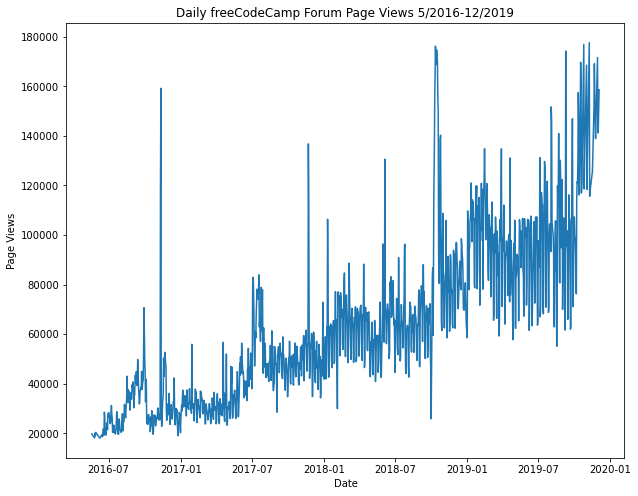

In [4]:
plt.figure(figsize=(16, 5))
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(df.index, df["value"])
ax.set(
    title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019",
    xlabel="Date",
    ylabel="Page Views",
)
# Save image and return fig (don't change this part)
fig.savefig("line_plot.png", bbox_inches="tight")

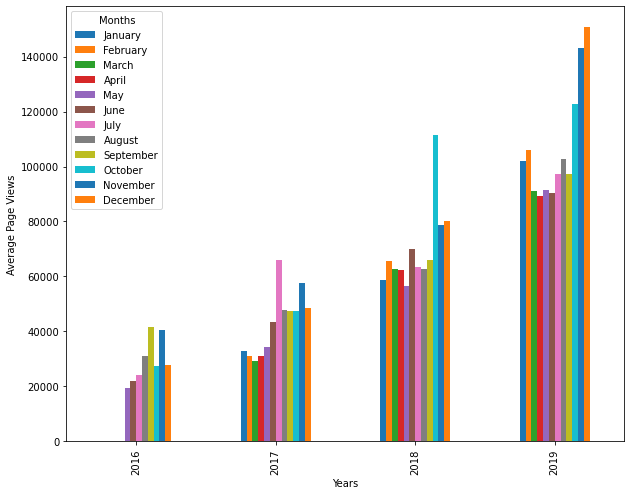

In [5]:
# Copy and modify data for monthly bar plot
# NOTE: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.year.html
df_bar = df.groupby([df.index.year, df.index.month]).mean()

# Draw bar plot
# ax = df_bar.plot(kind="bar")
# NOTE: Above is wrong. The level has to pivot so the index labels get accessed right.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html
ax = df_bar.unstack().plot(kind="bar")
fig = ax.get_figure()
fig.set_figwidth(10)
fig.set_figheight(8)
ax.legend(
    title="Months",
    labels=[
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ],
)

ax.set(xlabel="Years", ylabel="Average Page Views")

# Save image and return fig (don't change this part)
fig.savefig("bar_plot.png", bbox_inches="tight")

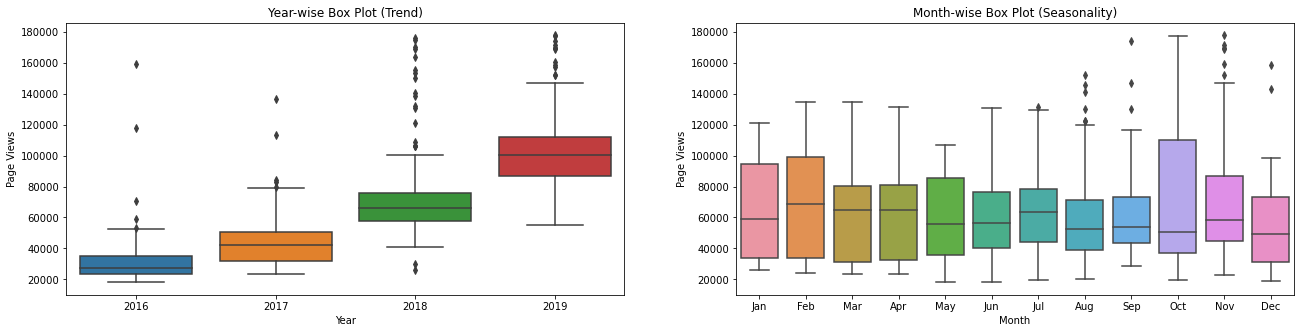

In [6]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box["year"] = [d.year for d in df_box.date]
df_box["month"] = [d.strftime("%b") for d in df_box.date]

# map month to number
month_number = {
    "Jan" : 1, 
    "Feb" : 2, 
    "Mar" : 3, 
    "Apr" : 4, 
    "May" : 5, 
    "Jun" : 6, 
    "Jul" : 7, 
    "Aug" : 8, 
    "Sep" : 9, 
    "Oct" : 10, 
    "Nov" : 11, 
    "Dec" : 12
    }

# apply map for replace method
df_box["month_num"] = df_box["month"]
df_box["month_num"].replace(to_replace=month_number, inplace=True)
df_box.sort_values(by=["month_num"], inplace=True)
df_box.drop(["month_num"], axis=1)

# Draw box plots (using Seaborn)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 5))

# sort month
months = [
    "Jan", 
    "Feb", 
    "Mar", 
    "Apr", 
    "May", 
    "Jun", 
    "Jul", 
    "Aug", 
    "Sep", 
    "Oct", 
    "Nov", 
    "Dec"
    ],
# use Seaborn
ax1 = sns.boxplot(data=df_box, x="year", y="value", ax=ax1)
ax1.set(
    title="Year-wise Box Plot (Trend)",
    xlabel="Year",
    ylabel="Page Views",
)

ax2 = sns.boxplot(data=df_box, x="month", y="value", ax=ax2)
ax2.set(
    title="Month-wise Box Plot (Seasonality)",
    xlabel="Month",
    ylabel="Page Views",
)

# Save image and return fig (don't change this part)
fig.savefig("box_plot.png", bbox_inches="tight")